In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import tweepy as tw
import pandas as pd
import datetime
from tweepy.parsers import JSONParser
import json
import matplotlib.pyplot as plt

In [0]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [0]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [0]:
places = api.geo_search(query="NY", granularity="city")
place_id = places[0].id

s = "place:%s" % place_id

start=datetime.date(2018,10,1)
current=datetime.date.today()

all_tweets=[]

ab = tw.Cursor(api.search,q=s).items(200)
for t in ab:
    # print(dir(t))
    all_tweets.append(json.dumps(t._json))
    #print("City: "+str(t.place.name)+" Time of tweet: "+str(t.created_at))

In [0]:
len(all_tweets)

100

In [0]:
# !pip install simplejson

In [0]:
import pandas as pd
file_path = '/content/drive/My Drive/'
# pd.read_json(file_path+'2018_11_07_18_onepercent.txt',lines=True)
from os.path import join, dirname
from jsonschema import validate
import json

def ab(data,jsonSchemaFilePath, l):
    schema = {}
    with open(jsonSchemaFilePath, 'r') as schema_file:
        schema = json.loads(schema_file.read())
    try:
        # Draft4Validator.check_schema(schema)
        validate(data, schema)
        l.append(data)
        # print(dict(data).get('user').get('id'))
    except BaseException as e:
        # print(str(e))
        pass

In [0]:
l = []

with open(file_path+'TwitterProject/2018_11_07_18_onepercent.txt', 'r') as f:
  str_ = f.readlines()
  f = open(file_path+'new_schema.json')
  #print(str_[0])
  for line in str_:
    if line.strip():
      ab(json.loads(line),file_path+'new_schema.json',l)


In [0]:
print(l[0])

{'created_at': 'Wed Nov 07 17:59:57 +0000 2018', 'id': 1060230389569126401, 'id_str': '1060230389569126401', 'text': 'RT @PanamaAmerica: #JudicialPA La reunión a la que no podrá asistir el empresario panameño, reúne a los jóvenes innovadores en el tema de l…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 795311323454140416, 'id_str': '795311323454140416', 'name': 'Elvis Hibbert T B.', 'screen_name': 'elvis_hibbert', 'location': None, 'url': None, 'description': 'Letras.// profesor.\nsin prisa...pero sin descanso.\npongo en contexto las mentiras disfrazadas de los que intentan maniobrar y confundir la opinion pública.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 842, 'friends_count': 760, 'listed_coun

In [0]:
len(l)

127504

In [0]:
a = pd.DataFrame.from_dict(l)

In [0]:
a.fillna("Na",inplace=True)

In [0]:
timeZone = a.place.apply(lambda x: x!= "Na")
timeZoneDf = a[timeZone]

In [0]:
timeZoneDf.head()

In [0]:
a.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,display_text_range,possibly_sensitive,extended_entities,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,withheld_in_countries,location
0,Wed Nov 07 17:59:57 +0000 2018,1060230389569126401,1060230389569126401,RT @PanamaAmerica: #JudicialPA La reunión a la...,"<a href=""http://twitter.com/download/android"" ...",False,Na,Na,Na,Na,Na,"{'id': 795311323454140416, 'id_str': '79531132...",Na,Na,Na,Na,{'created_at': 'Wed Nov 07 01:00:03 +0000 2018...,False,0,0,0,0,"{'hashtags': [{'text': 'JudicialPA', 'indices'...",False,False,low,es,0.001,Na,Na,Na,Na,Na,Na,Na,Na,Na,NA
1,Wed Nov 07 17:59:57 +0000 2018,1060230389585723392,1060230389585723392,@miyaxddd owなう,"<a href=""http://twitter.com/download/android"" ...",False,1.06023e+18,1060230231066210304,2.25483e+09,2254826762,miyaxddd,"{'id': 365950119, 'id_str': '365950119', 'name...",Na,Na,Na,Na,Na,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,ja,0.005,"[10, 14]",Na,Na,Na,Na,Na,Na,Na,Na,七森市
2,Wed Nov 07 17:59:57 +0000 2018,1060230389573341184,1060230389573341184,I can break a phone better than anyone else I ...,"<a href=""http://twitter.com/download/iphone"" r...",False,Na,Na,Na,Na,Na,"{'id': 3312683323, 'id_str': '3312683323', 'na...",Na,Na,Na,Na,Na,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,0.002,Na,Na,Na,Na,Na,Na,Na,Na,Na,"College Station, TX"
3,Wed Nov 07 17:59:57 +0000 2018,1060230389569073152,1060230389569073152,اللهم ﺍﻗﻀﻲ ﺣﺎﺟﺘﻲ، وﺍﻧس ﻭﺣﺪﺗﻲ، و ﻓﺮﺝ ﻛﺮﺑﺘﻲ يا ك...,"<a href=""http://qurani.tv"" rel=""nofollow"">تطبي...",False,Na,Na,Na,Na,Na,"{'id': 2866189938, 'id_str': '2866189938', 'na...",Na,Na,Na,Na,Na,False,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,low,ar,0.001,Na,False,Na,Na,Na,Na,Na,Na,Na,bakhoun
4,Wed Nov 07 17:59:57 +0000 2018,1060230389577453574,1060230389577453574,RT @_safeguard: @shadescfgray https://t.co/eHd...,"<a href=""http://twitter.com/download/iphone"" r...",False,Na,Na,Na,Na,Na,"{'id': 317255741, 'id_str': '317255741', 'name...",Na,Na,Na,Na,{'created_at': 'Wed Nov 07 17:33:48 +0000 2018...,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,und,0.003,Na,False,"{'media': [{'id': 1060223796488163330, 'id_str...",Na,Na,Na,Na,Na,Na,22:07 h


In [0]:
b = pd.DataFrame.from_dict(dict(a.user))

In [0]:
b.time_zone[0]

In [0]:
b = b.T

In [0]:
b.fillna("Na",inplace=True)

In [0]:
timeZone = b.utc_offset.apply(lambda x: x!= "Na")
timeZoneDf = b[timeZone]

In [0]:
timeZoneDf.head()

In [0]:
b.head()

In [0]:
#a.location = b.location
a['location'] = b['location'].values

In [0]:
a.timestamp_ms = a.timestamp_ms.astype(int)

In [0]:
a.timestamp_ms = a.timestamp_ms.apply(lambda x:(x-1541613597657)/1000)

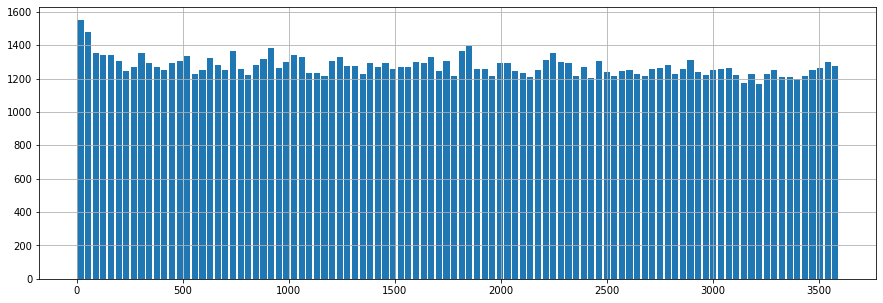

In [0]:
a.timestamp_ms.hist(bins=100, rwidth = 0.8, figsize=(15,5))

In [0]:
somedf = a.groupby('location')['id'].nunique()
plt.subplots(figsize=(20,5))
somedf.plot.line()

In [0]:
somedf

location
\tİzmir - Smyrna            1
\tפָּרָשַׁת דְּרָכִים       1
\t♌︎☉/↑ ♋︎☽                 1
\t砂隠れの里                     1
\n                          9
                           ..
🧞‍♂️                        1
🧠                           1
🧡                           1
🧫🦠🧬🧪                        1
󾓦Sandy Hook, Connecticut    1
Name: id, Length: 42722, dtype: int64

In [0]:
LocDf = pd.DataFrame(a.drop_duplicates().location.value_counts())
LocDf['LocationName'] = LocDf.index

In [0]:
locationData = pd.DataFrame({'location':newCol.location, 'LocationName': newCol.LocationName})
locationData.to_csv('/content/drive/My Drive/NewLocationData.csv',index=False);

In [0]:
print(a.shape)
print(somedf.shape)
print(new_df.shape)

(127504, 38)
(42722,)
(7258,)


In [0]:
new_df #United States

location
                  52
.                 39
021               45
027               21
Abuja, Nigeria    50
                  ..
日本 東京             40
東京                30
東京都               21
대한민국              43
대한민국 서울           22
Name: id, Length: 344, dtype: int64

In [0]:
newCol = somedf > 1
newDF = somedf[newCol]

In [0]:
a.location = a.location.fillna("NA");

In [0]:
new_col = a.location.apply(lambda x:'United States' in x  or 'USA' in x)
new_df = a[new_col]

In [0]:
newDF.head(20)

location
\n                              9
                               52
                                5
                                4
                                2
   Kuwait                       3
  البصره                        2
 #توته  ❤🌹                      2
 - Kuwait 🇰🇼                    2
 93/ Noisy-le-Grand, France     2
 A Ville called Thrill          2
 Argentina                      2
 Arkansas                       2
 Brasil                         4
 Bullet,Suisse.                 2
 California                     2
 Campos de Algodón              2
 Catalunya                      2
 Cumbria, UK                    2
 España                         4
Name: id, dtype: int64

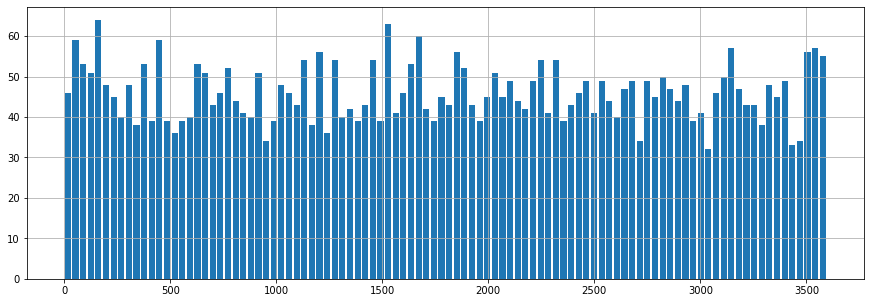

In [0]:
new_df.timestamp_ms.hist(bins=100, rwidth = 0.8, figsize=(15,5))

In [0]:
new_df.timestamp_ms.max()

3595.007

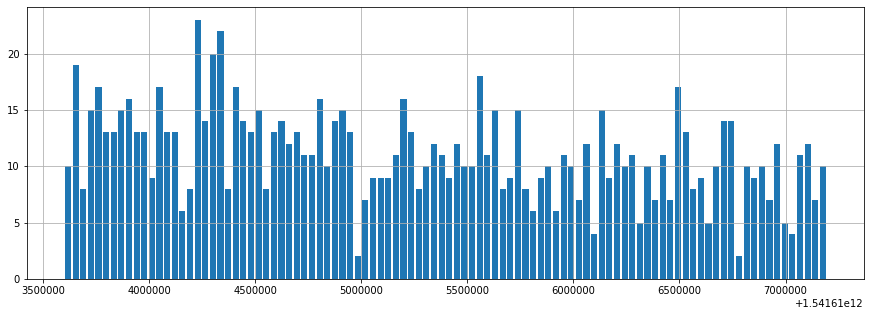

In [0]:
new_col = a.location.apply(lambda x:'India' in x)
new_df = a[new_col]
new_df.timestamp_ms.hist(bins=100, rwidth = 0.8, figsize=(15,5))

In [0]:
new_df

In [0]:
loc = a.location.unique()

In [0]:
loc

array(['NA', '七森市', 'College Station, TX', ..., 'snow rol ',
       'Out of time ', 'cirque du trash'], dtype=object)

In [0]:
us_state_list=["alabama","alaska","arizona","arkansas","california",
               "colorado","connecticut","delaware","florida","georgia",
               "hawaii","idaho","illinois","indiana","iowa","kansas","kentucky",
               "louisiana","maine","maryland","massachusetts","michigan","minnesota",
               "mississippi","missouri","montana","nebraska","nevada","newhampshire",
               "newjersey","newmexico","newyork","northcarolina","northdakota","ohio",
               "oklahoma","oregon","pennsylvania","rhodeisland","southcarolina","southdakota",
               "tennessee","texas","utah","vermont","virginia","washington","westvirginia",
               "wisconsin","wyoming","al","ak","az","ar","ca","co","ct","de","fl","ga","hi",
               "id","il","in","ia","ks","ky","la","me","md","ma","mi","mn","ms","mo","mt","ne",
               "nv","nh","nj","nm","ny","nc","nd","oh","ok","or","pa","ri","sc","sd","tn","tx",
               "ut","vt","va","wa","wv","wi","wy","unitedstates","usa","us","unitedstatesofamerica"]
us_state_set = set()
for state in us_state_list:
  us_state_set.add(state)

In [0]:
us_state_set

In [0]:
import os
import tweepy as tw
import pandas as pd
import datetime
from tweepy.parsers import JSONParser
import rapidjson
import matplotlib.pyplot as plt
from jsonschema import validate
import numpy as np
import json


file_path = '/content/drive/My Drive/'

json_schema = file_path+'new_schema.json'

tw_19_path = file_path+'TwitterProject/2018_11_07_18_onepercent.txt'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


file_path = '/content/drive/My Drive/'
# pd.read_json(file_path+'2018_11_07_18_onepercent.txt',lines=True)


def ab(data,jsonSchemaFilePath, l):
    schema = {}
    with open(jsonSchemaFilePath, 'r') as schema_file:
        schema = json.loads(schema_file.read())
    try:
        # Draft4Validator.check_schema(schema)
        validate(data, schema)
        l.append(data)
        # print(dict(data).get('user').get('id'))
    except BaseException as e:
        # print(str(e))
        pass




def ab(data,schema, list_data):
    
    try:
        # Draft4Validator.check_schema(schema)
        validate(data, schema)
        list_data.append(data)
        #print(dict(data).get('user').get('id'))
    except BaseException as e:
        #print(str(e))
        pass


list_data = []
schema = {}
with open(json_schema, 'r') as schema_file:
    schema = rapidjson.loads(schema_file.read())


with open(tw_19_path, 'r') as f:
  str_ = f.readlines()
  #f = open(json_schema)
  #print(str_[0])
  for line in str_:
    if line.strip():
      ab(rapidjson.loads(line),schema,list_data)


tweets = pd.DataFrame.from_dict(list_data)

drop_cols=['utc_offset','time_zone','lang','geo_enabled','following',
          'follow_request_sent','notifications','contributors_enabled','profile_image_url',
          'profile_background_color','profile_background_image_url',
          'profile_background_image_url_https','profile_background_tile',
          'profile_link_color','profile_sidebar_border_color','profile_sidebar_fill_color',
          'profile_text_color','profile_use_background_image','is_translator','translator_type']
tweet_user = pd.DataFrame.from_dict(dict(tweets.user))
tweet_user = tweet_user.T
#tweet_user['tweet_created_at'] = tweets['created_at']
tweet_user.insert(loc = 0, column ='tweet_created_at', value=tweets['created_at'])
tweet_user.insert(loc = 1, column ='timestamp_ms', value=tweets['timestamp_ms'])
tweet_user.drop(drop_cols, axis = 1,inplace=True)

user_data = tweet_user.copy()
user_data['location'].fillna("NA",inplace=True)
